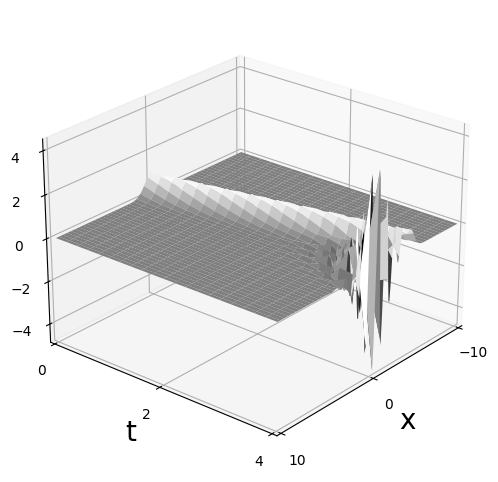

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags

# Parameters
Time = 4
L = 20
n = 200
x2 = np.linspace(-L/2, L/2, n+1)
x = x2[:n]
dx = x[1] - x[0]
dt = 0.2
CFL = dt / dx
time_steps = int(Time / dt)
t = np.arange(0, Time + dt, dt)

# Initial conditions
u0 = np.exp(-x**2)
u1 = np.exp(-(x + dt)**2)
usol = np.zeros((n, time_steps + 1))
usol[:, 0] = u0
usol[:, 1] = u1

# Sparse matrix for derivative term
e1 = np.ones(n)
A = diags([-e1, e1], [-1, 1], shape=(n, n)).toarray()
A[0, -1] = -1
A[-1, 0] = 1

# Leap frog (2,2) iteration scheme or Euler
for j in range(time_steps-1):
    u2 = u0 + CFL * A.dot(u1)  # Leap frog (2,2)
    u0 = u1
    u1 = u2
    usol[:, j + 2] = u2

# Plot the data
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, usol.T, cmap='gray')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('t', fontsize=20)
ax.set_zlabel('u', fontsize=20)
ax.set_xlim([-L/2, L/2])
ax.set_xticks([-L/2, 0, L/2])
ax.set_ylim([0, Time])
ax.set_yticks([0, Time/2, Time])
ax.view_init(25, 40)
plt.show()


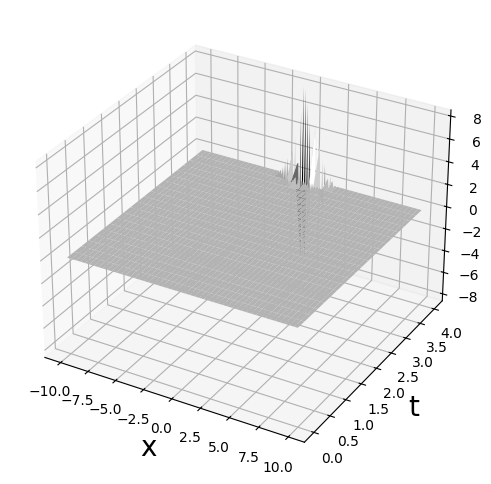

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags

# Initial conditions
u0 = np.exp(-x**2)
u1 = np.exp(-(x + dt)**2)
usol = np.zeros((n, time_steps + 1))
usol[:, 0] = u0
usol[:, 1] = u1

# Sparse matrix for second derivative term
e1 = np.ones(n)
A = diags([e1, -2*e1, e1], [-1, 0, 1], shape=(n, n)).toarray()
A[0, -1] = 1
A[-1, 0] = 1

# Leap frog (2,2) iteration scheme
for j in range(time_steps - 1):
    u2 = u0 + 2 * CFL * A.dot(u1)  # Leap frog (2,2)
    u0 = u1
    u1 = u2
    usol[:, j + 2] = u2

# Plot the data
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, usol.T, cmap='gray')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('t', fontsize=20)
ax.set_zlabel('u', fontsize=20)
plt.show()

